In [2]:
import random
from __future__ import division

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls / older_girl
print "P(both | either):", both_girls / either_girl

P(both | older): 0.514228456914
P(both | either): 0.341541328364


In [3]:
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma**2) 
           / (sqrt_two_pi * sigma))

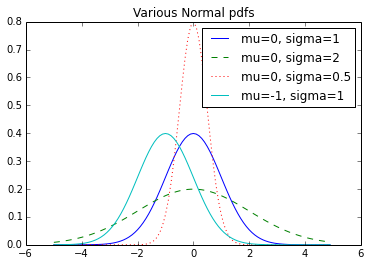

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs],
        '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs],
        '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs],
        ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs],
        '-', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")

In [5]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

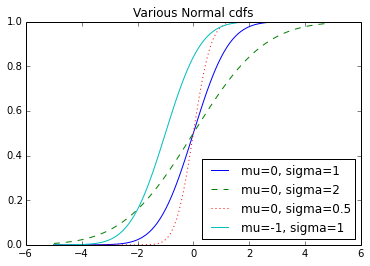

In [6]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs],
        '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs],
        '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs],
        ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs],
        '-', label='mu=-1, sigma=1')
plt.legend(loc=4)  # bottom right
plt.title("Various Normal cdfs")

In [7]:
def inverse_normal_cdf(p, mu=0, sigma=1,tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

In [8]:
# Central Limit Thoerem
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

from collections import Counter

def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i + 0.5, mu, sigma)
          - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Dist. vs. Normal Approximation")

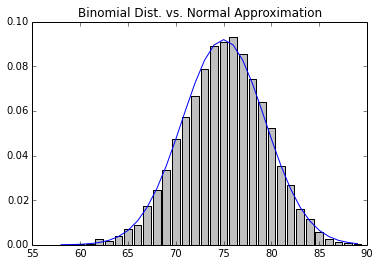

In [10]:
make_hist(0.75, 100, 10000)